# Phân cụm dữ liệu sử dụng K-means

## I. Chuẩn bị dữ liệu

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array,
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data),
        X_scaled_df
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu là X_origin là X ban đầu đã được One Hot và X đã được làm sạch, chuẩn hóa.
X = X_final
X_origin = X_encode

**Dữ liệu đã ban đầu**

In [2]:
X_origin

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Dữ liệu đã được chuẩn hóa**

In [3]:
X

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel_Travel_Frequently,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,3,2,4,3,1,0,1,0.0,...,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1,3,2,2,2,4,4,1,3,1.0,...,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806542
2,2,4,2,1,3,3,2,0,3,0.0,...,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,4,4,3,1,3,3,3,0,3,1.0,...,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252145,-1.155935
4,1,1,3,1,2,3,4,1,3,0.0,...,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,3,1,3,1.0,...,-0.835451,-0.284329,0.523316,0.489376,0.735447,0.155707,-0.327893,-0.615492,-0.679146,-0.314873
1466,1,4,2,3,1,3,1,1,3,0.0,...,0.741140,1.004010,0.523316,-0.057267,-0.293077,1.707500,-0.001333,0.764998,-0.368715,0.806542
1467,3,2,4,2,2,4,2,1,3,0.0,...,-0.076690,-1.284418,-0.678049,1.309341,-0.678774,-2.171982,-0.164613,-0.615492,-0.679146,-0.314873
1468,3,4,2,2,2,3,4,0,2,1.0,...,-0.236474,-0.150393,-0.277594,-0.330589,0.735447,0.155707,0.325228,0.488900,-0.679146,1.086895


## Định nghĩa Class, Function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_X(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n_features = X.shape[1]

    if n_features == 1:
        plt.figure(figsize=(7,4))
        plt.scatter(X[:, 0], [0]*len(X), c=labels, s=50)
        plt.title("1D Data Visualization")
        plt.yticks([])  # ẩn trục Y
        plt.xlabel("Feature 1")
        plt.show()

    elif n_features == 2:
        plt.figure(figsize=(7,5))
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title("2D Data Visualization")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    elif n_features == 3:
        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50)
        ax.set_title("3D Data Visualization")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Feature 3")
        plt.show()

    else:
        raise ValueError("Dữ liệu phải có 1, 2 hoặc 3 chiều để trực quan.")


## II. Thực nghiệm phân tích số cụm

**Nhận xét:**

Để biết xem dữ liệu nên được phân làm bao nhiêu cụm thì ở đây, chúng tôi có một số thực nghiệm cơ bản bằng cách phân cụm sử dụng K-Mean với các tham số là các cụm từ 2 đến 15 cụm.

**Với dữ liệu đã được chuẩn hóa**

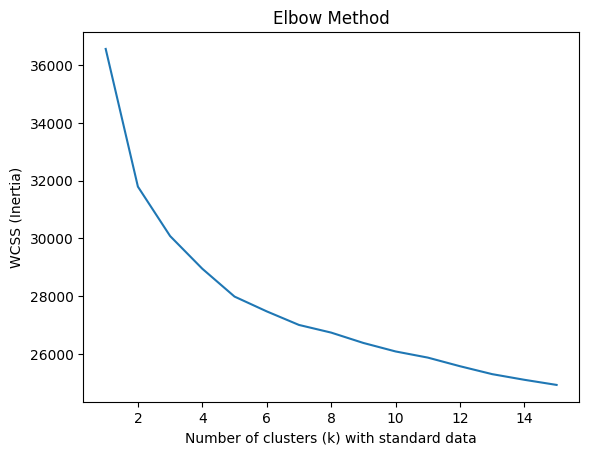

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k) with standard data')
plt.ylabel('WCSS (Inertia)')
plt.show()

Nhận xét:

Qua biểu đồ, ta có thể thấy được WCSS giảm rất mạnh từ 1 đến 3, 4 cho thấy việc tăng số cụm trong khoảng này giúp mô hình cải thiện đáng kể.

Trong khoảng 4 - 6 thì WCSS vẫn còn giảm tuy nhiên chậm hơn, biểu thị rằng cấu trúc các cụm trở nên ổn định dần.

Từ khoảng 6 trở đi thì WCSS giảm tuy nhiên ít hơn ban đầu, điều này cho thấy tăng số cụm không mang lại nhiều ý nghĩa mà chỉ làm chia nhỏ cụm hiện có.

=> Nên ở đây với dữ liệu đã được chuẩn hóa số cụm có thể ước trừng cho mô hình DBScan là khoảng 4 cụm.

**Với dữ liệu gốc ban đầu**

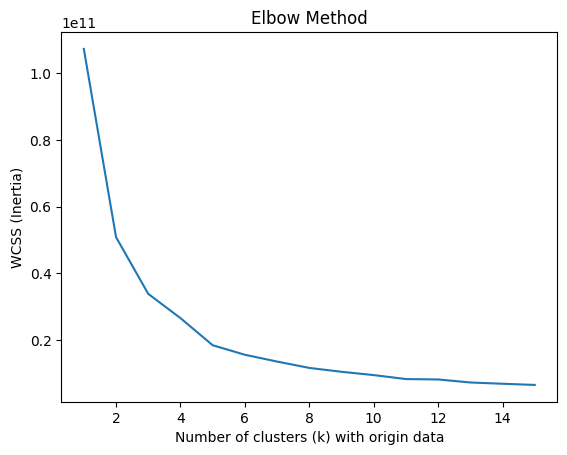

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_origin)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k) with origin data')
plt.ylabel('WCSS (Inertia)')
plt.show()

Nhận xét:

Tương tự với dữ liệu đã được chuẩn hóa thì ở đây chúng tôi ước chừng cho mô hình K-means là trong khoảng 4 cụm.

## III. Thực hiện phân cụm

### Trực quan dữ liệu đã giảm chiều

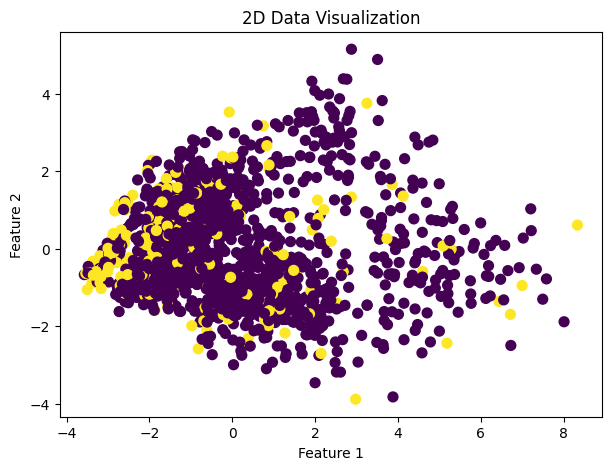

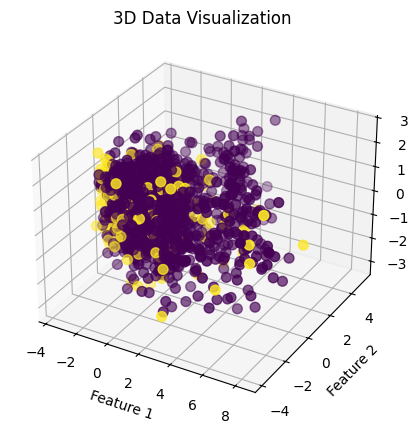

In [7]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components = 2)
pca3d = PCA(n_components = 3)

pca5d = PCA(n_components = 5)
pca6d = PCA(n_components = 6)

X_2d = pca2d.fit_transform(X)
X_3d = pca3d.fit_transform(X)
X_5d = pca5d.fit_transform(X)
X_6d = pca6d.fit_transform(X)

visualize_X(X_2d, y)
visualize_X(X_3d, y)

### Thực hiện phân cụm

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score


In [9]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np

def kmeans_experiment(X, y, k_list, random_state=42):
    results = []

    for k in k_list:
        kmeans = KMeans(
            n_clusters=k,
            init="k-means++",
            n_init=10,
            random_state=random_state
        )
        y_pred = kmeans.fit_predict(X)

        ari = adjusted_rand_score(y, y_pred)

        results.append({
            "k": k,
            "ARI": ari
        })

    return pd.DataFrame(results).sort_values("ARI", ascending=False)

In [11]:
k_list = [2, 3, 4, 5, 6, 7, 8]

**Với dữ liệu ban đầu**

In [12]:
df_origin = kmeans_experiment(X, y, k_list)
print(df_origin)

   k       ARI
5  7  0.005852
6  8  0.003432
4  6  0.001449
2  4 -0.005583
3  5 -0.009324
0  2 -0.035594
1  3 -0.042245


- Kết quả:
    - ARI rất thấp, dao động quanh 0

    - Giá trị tốt nhất: k = 7, ARI ≈ 0.0059

- Nhận xét:

    - K-means không tìm được cấu trúc cụm phù hợp với nhãn thật

    - Dữ liệu one-hot có:

        - Nhiều chiều

        - Khoảng cách Euclidean kém ý nghĩa

    - Việc chuẩn hóa không giải quyết được vấn đề hình học của dữ liệu

=> K-means hoạt động gần như ngẫu nhiên trên dữ liệu gốc.

**Với dữ liệu giảm về 2 chiều**

In [13]:
df_pca2 = kmeans_experiment(X_2d, y, k_list)
print(df_pca2)

   k       ARI
5  7 -0.006845
3  5 -0.009569
6  8 -0.010765
4  6 -0.013797
2  4 -0.025229
0  2 -0.034565
1  3 -0.041807


- Kết quả
    - Toàn bộ ARI đều âm

    - Không có giá trị k nào cho kết quả tốt

- Nhận xét:

    - PCA 2D làm mất quá nhiều thông tin

    - Không gian 2 chiều không bảo toàn cấu trúc phân lớp

    - K-means bị ép cụm trên biểu diễn quá đơn giản

=> PCA 2D không phù hợp cho K-means trong bài toán này.

**Với dữ liệu còn 3 chiều**

In [14]:
df_pca3 = kmeans_experiment(X_3d, y, k_list)
print(df_pca3)

   k       ARI
4  6  0.002151
6  8 -0.000261
5  7 -0.003518
3  5 -0.007023
2  4 -0.026613
0  2 -0.035594
1  3 -0.041807


- Kết quả:

    - ARI cao nhất: k = 6, ARI ≈ 0.0022

    - Một vài giá trị gần 0 nhưng không đáng kể

- Nhận xét:

    - PCA 3D giúp giữ lại thêm thông tin so với 2D

    - Tuy nhiên chưa đủ để hình thành cấu trúc cụm rõ ràng

    - K-means vẫn bị giới hạn bởi giả định cụm hình cầu

=> Cải thiện nhẹ so với PCA 2D, nhưng không thực sự hiệu quả.

**Với dữ liệu còn 5 chiều**

In [15]:
df_pca5 = kmeans_experiment(X_5d, y, k_list)
print(df_pca5)

   k       ARI
4  6 -0.001115
6  8 -0.002720
5  7 -0.006104
3  5 -0.011444
2  4 -0.027248
0  2 -0.035597
1  3 -0.042057


- Kết quả:

    - ARI vẫn chủ yếu âm

    - Không có cải thiện rõ rệt

- Nhận xét:

    - Việc tăng số chiều PCA không đồng nghĩa với cải thiện phân cụm

    - K-means vẫn không phù hợp với hình dạng dữ liệu

=> PCA 5D không mang lại lợi ích đáng kể.

**Với dữ liệu giữ lại 90% thông tin**

In [16]:
from sklearn.decomposition import PCA

pca90 = PCA(n_components = 0.9)

X_90_percent = pca90.fit_transform(X)
df_pca90 = kmeans_experiment(X_90_percent, y, k_list)
print(df_pca90)

   k       ARI
5  7  0.004883
4  6  0.001021
6  8 -0.002164
2  4 -0.005259
3  5 -0.009054
0  2 -0.036636
1  3 -0.041624


- Kết quả:

    - ARI cao nhất: k = 7, ARI ≈ 0.0049

    - Tốt hơn PCA cố định số chiều

- Nhận xét:

    - Giữ 90% phương sai giúp:

        - Giảm nhiễu

        - Bảo toàn thông tin quan trọng

    - Tuy nhiên ARI vẫn rất thấp

=> Đây là cách tốt nhất trong nhóm PCA, nhưng K-means vẫn không phù hợp.

**Thực nghiệm với LDA**

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
df_lda = kmeans_experiment(X_lda, y, k_list)
print(df_lda)

   k       ARI
1  3  0.120366
0  2  0.119530
2  4  0.093000
3  5  0.078202
4  6  0.062683
5  7  0.049959
6  8  0.042574


- Kết quả nổi bật:

    - ARI cao nhất:

        - k = 3, ARI ≈ 0.120

        - k = 2, ARI ≈ 0.119

- Nhận xét quan trọng:

    - LDA là giảm chiều có giám sát

    - Dữ liệu được chiếu theo hướng tối đa phân biệt lớp

    - K-means hưởng lợi trực tiếp từ thông tin nhãn

=> Kết quả vượt trội so với PCA và dữ liệu gốc

## IV. Nhận xét


### Bảng So Sánh Tổng Hợp Hiệu Suất Clustering

| Phương pháp | ARI cao nhất | Đánh giá |
| :--- | :--- | :--- |
| Gốc (one-hot + scale) | ~0.006 | Rất kém |
| PCA 2D | < 0 | Tệ |
| PCA 3D | ~0.002 | Kém |
| PCA 5D | < 0 | Không cải thiện |
| PCA 90% | ~0.005 | **Tốt nhất trong PCA** |
| **LDA** | **~0.12** | **Tốt nhất (có giám sát)** |

Kết quả thực nghiệm cho thấy K-means không phù hợp với dữ liệu ban đầu cũng như dữ liệu sau khi giảm chiều bằng PCA, thể hiện qua chỉ số ARI rất thấp hoặc âm. Nguyên nhân đến từ giả định cụm hình cầu và việc sử dụng khoảng cách Euclidean trong không gian dữ liệu one-hot có chiều cao. Khi sử dụng LDA – một phương pháp giảm chiều có giám sát – kết quả phân cụm được cải thiện đáng kể, tuy nhiên điều này làm mất đi tính chất học không giám sát. Do đó, K-means không phải là lựa chọn phù hợp cho bài toán phân cụm trong nghiên cứu này.

## V. Trực quan hóa

Do dữ liệu ban đầu có số chiều lớn, việc trực quan trực tiếp là không khả thi. Vì vậy, chúng tôi tiến hành trực quan hóa dữ liệu sau khi giảm chiều bằng:

    - LDA (1 chiều)

    - PCA (2 chiều)

    - PCA (3 chiều)

Trong mỗi trường hợp, chúng tôi sử dụng giá trị k cho kết quả ARI cao nhất thu được trong quá trình thực nghiệm K-means.

**Trực quan hóa 1 chiều với LDA** | k = 3 (ARI cao nhất với LDA)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14140\2342045518.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(unique_labels))


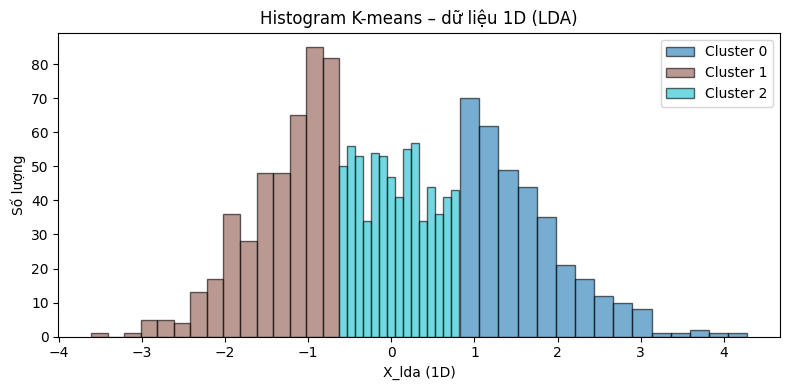

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_lda)

x = X_lda.reshape(-1)

unique_labels = sorted(set(labels))
cmap = cm.get_cmap("tab10", len(unique_labels))
label2color = {lb: cmap(i) for i, lb in enumerate(unique_labels)}

plt.figure(figsize=(8, 4))

for lb in unique_labels:
    plt.hist(
        x[labels == lb],
        bins=15,
        alpha=0.6,
        color=label2color[lb],
        edgecolor="black",
        label=f"Cluster {lb}"
    )

plt.xlabel("X_lda (1D)")
plt.ylabel("Số lượng")
plt.title("Histogram K-means – dữ liệu 1D (LDA)")
plt.legend()
plt.tight_layout()
plt.show()


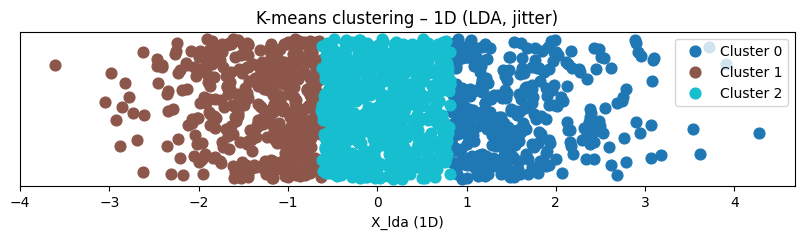

In [19]:
y = np.random.uniform(-0.02, 0.02, size=len(x))

plt.figure(figsize=(10, 2))
for lb in unique_labels:
    plt.scatter(
        x[labels == lb],
        y[labels == lb],
        color=label2color[lb],
        s=60,
        label=f"Cluster {lb}"
    )

plt.yticks([])
plt.xlabel("X_lda (1D)")
plt.title("K-means clustering – 1D (LDA, jitter)")
plt.legend()
plt.show()


Nhận xét:
- Ưu điểm: LDA đã làm rất tốt việc tách các cụm ra theo một trục (trục X_lda). Ta có thể thấy rõ 3 đỉnh (peak) phân phối của 3 cụm.

- Vùng chồng lấn (Overlap): Hình Histogram cho thấy sự giao thoa (overlap) giữa Cụm 1 (nâu) và Cụm 2 (xanh ngọc), cũng như Cụm 2 và Cụm 0 (xanh dương). Điều này nghĩa là ngay cả khi dùng LDA, vẫn có những điểm dữ liệu "nhập nhằng" ở biên giới giữa các cụm.

- Lưu ý: LDA thường cho kết quả trực quan hóa tốt hơn PCA vì nó "ăn gian" bằng cách sử dụng nhãn (labels) từ K-means để tìm trục phân tách tốt nhất.

**Trực quan dữ liệu 2 chiều với PCA** | k = 7 (ARI cao nhất với PCA 2D)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14140\3208078112.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(unique_labels))


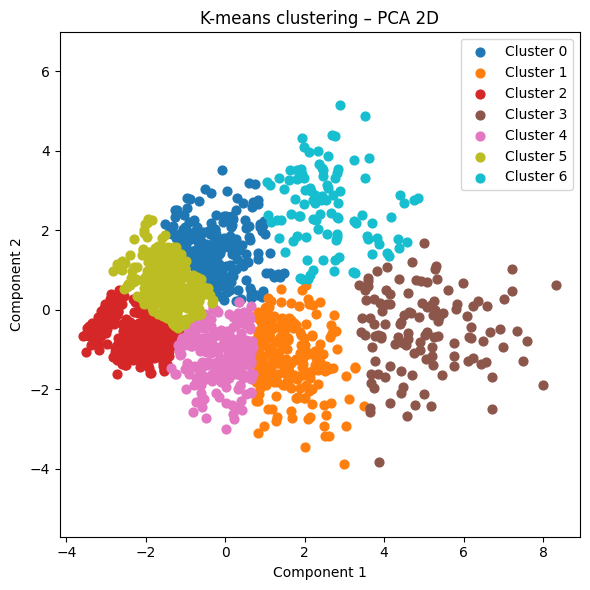

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_2d)

unique_labels = sorted(set(labels))
cmap = cm.get_cmap("tab10", len(unique_labels))
label2color = {lb: cmap(i) for i, lb in enumerate(unique_labels)}

plt.figure(figsize=(6, 6))

for lb in unique_labels:
    plt.scatter(
        X_2d[labels == lb, 0],
        X_2d[labels == lb, 1],
        s=40,
        color=label2color[lb],
        label=f"Cluster {lb}"
    )

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("K-means clustering – PCA 2D")
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.show()


Nhận xét:
- Ưu điểm: Các cụm (cluster) đã bắt đầu hình thành các vùng riêng biệt (ví dụ: cụm màu đỏ và xanh lá mạ nằm tách biệt về phía trái).

- Nhược điểm: Vùng trung tâm rất hỗn loạn. Cụm màu tím, xanh dương và nâu xám bị chồng lấn (overlap) lên nhau rất nhiều. Điều này cho thấy dữ liệu gốc khi chiếu xuống 2 chiều không phân tách tuyến tính rõ ràng.

**Trực quan dữ liệu 3 chiều với PCA** | k = 6 (ARI cao nhất với PCA 3D)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14140\3799330022.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(unique_labels))


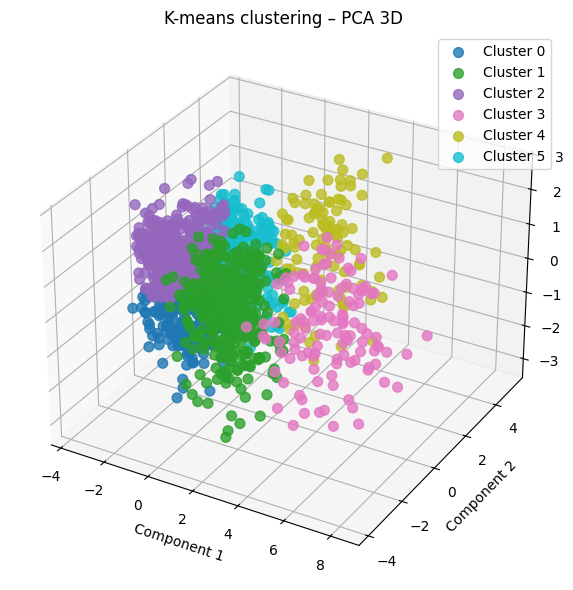

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_3d)

X = np.asarray(X_3d)
unique_labels = sorted(set(labels))

cmap = cm.get_cmap("tab10", len(unique_labels))
label2color = {lb: cmap(i) for i, lb in enumerate(unique_labels)}

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

for lb in unique_labels:
    ax.scatter(
        X[labels == lb, 0],
        X[labels == lb, 1],
        X[labels == lb, 2],
        c=[label2color[lb]],
        s=50,
        alpha=0.8,
        label=f"Cluster {lb}"
    )

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("K-means clustering – PCA 3D")
ax.legend()
plt.tight_layout()
plt.show()


- Nhận xét: Khi tăng lên 3 chiều, các điểm dữ liệu vẫn co cụm lại thành một khối lớn (blob) ở giữa. Mặc dù có thêm chiều sâu (trục Z), nhưng ranh giới giữa các cụm vẫn rất mờ nhạt.
- Kết luận: Với dữ liệu này, việc dùng PCA để trực quan hóa kết quả K-means cho thấy các cụm không tách rời nhau tốt lắm.